<a href="https://colab.research.google.com/github/quy205/project/blob/main/QuyLP_CE190625.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
quandang_vietnamese_foods_path = kagglehub.dataset_download('quandang/vietnamese-foods')

print('Data source import complete.')


Data source import complete.


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Streaming output truncated to the last 5000 lines.
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/513.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/766.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/85.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/564.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/359.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/265.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/289.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/1331.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/118.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/1037.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/950.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/361.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/1136.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/591.jpg
/kaggle/input/vietnamese-foods/Images/Train/Bun bo Hue/1171.jpg
/

No GPU found. Using CPU instead.
Loading model on CPU:0
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extracting features: 100%|██████████| 5040/5040 [18:21<00:00,  4.57it/s]


Shape of features: (5040, 1280)


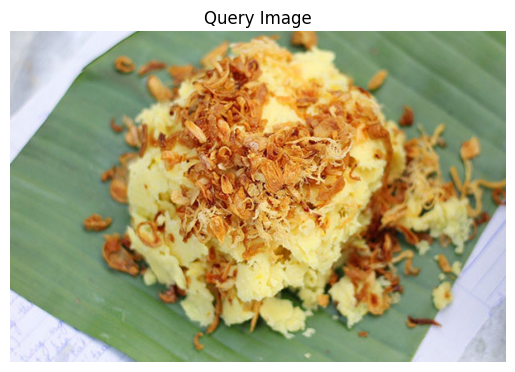

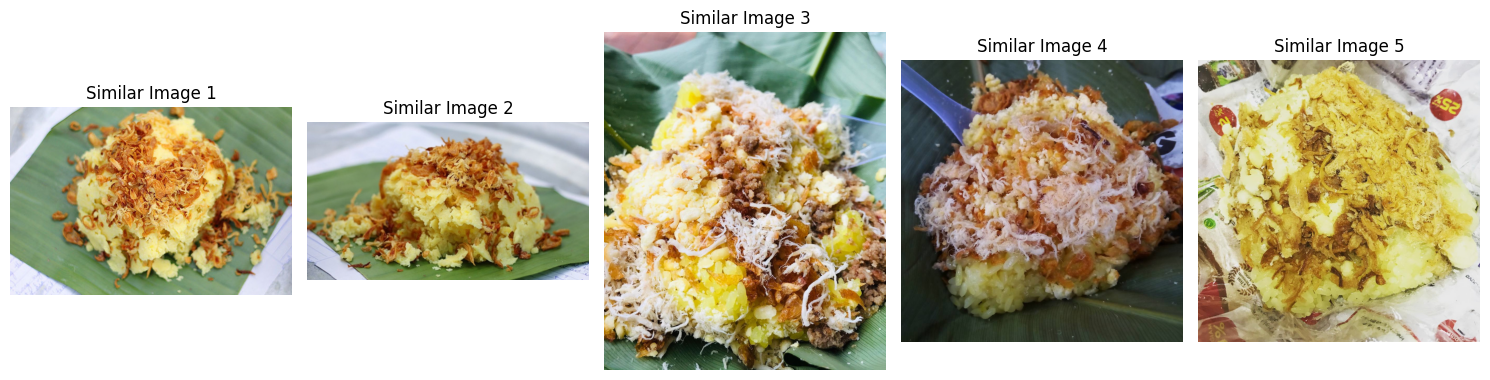

In [ ]:
from IPython import get_ipython
from IPython.display import display

# %%
from google.colab import drive
# TODO: Mount Google Drive
# drive.mount('/content/drive')

# %%
# TODO: Install necessary libraries (keras, tensorflow, opencv-python-headless, scikit-learn)
!pip install keras -q
!pip install tensorflow -q
!pip install opencv-python-headless -q
!pip install scikit-learn -q
!pip install tqdm -q
# %%
# Step 2: Import necessary libraries
# import numpy as np
# import os
# import cv2
# from sklearn.metrics.pairwise import cosine_similarity
# from keras.applications import VGG16
# from keras.applications.vgg16 import preprocess_input
# from keras.preprocessing import image
# from google.colab import drive
# import matplotlib.pyplot as plt

# Step 2: Import necessary libraries
# TODO: Import the following libraries: numpy, os, cv2, cosine_similarity from sklearn.metrics.pairwise, EfficientNetB0 from keras.applications, preprocess_input from keras.applications.efficientnet, image from keras.preprocessing, drive from google.colab, matplotlib.pyplot as plt.
# import ______ as ______
# import ______
# import ______
# from ______ import ______
# from ______ import ______
# from ______ import ______
# from ______ import ______
# import ______ as ______

import numpy as np
import os
import cv2
from sklearn.metrics.pairwise import cosine_similarity
from keras.applications import EfficientNetB0
from keras.applications.efficientnet import preprocess_input
from keras.preprocessing import image
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf
# Step 3: Connect Google Drive
# TODO: Mount Google Drive again (sometimes needed in Colab)
# drive.mount('/content/drive')
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("GPU is available and will be used.")
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
else:
    print("No GPU found. Using CPU instead.")
# %%
# Step 4: Load the EfficientNetB0 model and define the feature extraction function
# TODO: Load the EfficientNetB0 model with 'imagenet' weights and exclude the top layer
# model = ______

# def extract_features(img_path, model):
#     img = image.load_img(img_path, target_size=(224, 224))
#     img_data = image.img_to_array(img)
#     img_data = np.expand_dims(img_data, axis=0)
#     img_data = preprocess_input(img_data)

#     efficientnet_feature = model.predict(img_data)
#     return efficientnet_feature.flatten()  # Returns the feature vector
with tf.device('/GPU:0' if physical_devices else '/CPU:0'):
    print(f"Loading model on {'GPU:0' if physical_devices else 'CPU:0'}")
    model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path, model):
    with tf.device('/GPU:0' if physical_devices else '/CPU:0'):
        try:
            img = image.load_img(img_path, target_size=(224, 224))
            img_data = image.img_to_array(img)
            img_data = np.expand_dims(img_data, axis=0)
            img_data = preprocess_input(img_data)
            efficientnet_feature = model.predict(img_data, verbose=0)  # Disable verbose output
            return efficientnet_feature.flatten()  # Returns the feature vector
        except Exception as e:
            print(f"Error extracting features from {img_path}: {e}")
            return None
# TODO: Define the feature extraction function 'extract_features' that takes img_path and model as input.
# It should load the image, preprocess it, get predictions from the model, and return the flattened feature vector.
# def ______ (img_path, model):
#     img = image.______ (img_path, target_size=(224, 224))
#     img_data = image.______ (img)
#     img_data = np.______ (img_data, axis=0)
#     img_data = ______ (img_data)
#
#     efficientnet_feature = model.______ (img_data)
#     return efficientnet_feature.______ ()  # Returns the feature vector

# %%
# Step 5: Path containing dataset and feature extraction
# TODO: Define the path to your dataset
# dataset_path = ______
dataset_path = '/kaggle/input/vietnamese-foods/Images/Test'
features = []
image_paths = []
from tqdm import tqdm
total_images = sum([len(files) for r, d, files in os.walk(dataset_path) if any(f.lower().endswith(('.png', '.jpg', '.jpeg')) for f in files)])

# TODO: Use os.walk to iterate through all directories and files in the dataset path.
# For each image file (ending with .png, .jpg, or .jpeg), append the image path to image_paths and extract features, then append to features.
with tqdm(total=total_images, desc="Extracting features") as pbar:
    for root, dirs, files in os.walk(dataset_path):
        for img_file in files:
            img_path = os.path.join(root, img_file)
            if img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_paths.append(img_path)
                feature = extract_features(img_path, model)
                if feature is not None:
                    features.append(feature)
                pbar.update(1)
#             ______ .append(img_path)
#             ______ .append(extract_features(img_path, model))

# TODO: Convert the features list to a numpy array
features = np.array(features)

print(f"Shape of features: {features.shape}")

# %%
# Step 7: Define the function to find similar images
# TODO: Define the function 'find_similar_images' that takes query_image_path, features, image_paths, and top_n as input (default top_n=5).
# It should extract features for the query image, calculate cosine similarity with all dataset features, get the indices of the top_n similar images, and return the list of image paths.
# Handle potential errors during feature extraction from the query image.
# def ______ (query_image_path, features, image_paths, top_n=5):
#     # Extract features of query image
#     try:
#         query_features = ______ (query_image_path, model)
#     except Exception as e:
#         print(f"Error extracting features from query image: {e}")
#         return []

    # Check the size of the feature array
#     if features.size == 0:
#         print("No features found in dataset.")
#         return []

#     # Calculate the cosine similarity between the query image and all images in the dataset
#     similarities = ______ ([query_features], features)

#     similar_indices = similarities.argsort()[0][::-1][:top_n]

#     similar_images = [image_paths[i] for i in similar_indices]
#     return similar_images
def find_similar_images(query_image_path, features, image_paths, top_n=5):
    # Extract features of query image
    try:
        query_features = extract_features(query_image_path, model)
        if query_features is None:
            print("Failed to extract features from query image.")
            return []
    except Exception as e:
        print(f"Error extracting features from query image: {e}")
        return []

    # Check the size of the feature array
    if features.size == 0:
        print("No features found in dataset.")
        return []

    # Calculate cosine similarity
    similarities = cosine_similarity([query_features], features)

    # Get indices of top_n similar images
    similar_indices = similarities.argsort()[0][::-1][:top_n]

    similar_images = [image_paths[i] for i in similar_indices]
    return similar_images
# %%
# Step 8: Path to query image
# TODO: Define the path to your query image
query_image_path = '/kaggle/input/vietnamese-foods/Images/Test/Xoi xeo/1.jpg'
img_1 = cv2.imread(query_image_path)
if img_1 is None:
    print(f"Error: Could not load query image at {query_image_path}")
else:
    img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)
    plt.imshow(img_1)
    plt.axis('off')
    plt.title('Query Image')
    plt.show()
# TODO: Read the query image using cv2, convert its color space to RGB, and display it using matplotlib.
# img_1 = cv2.______ (query_image_path)
# img_1 = cv2.______ (img_1, cv2.COLOR_BGR2RGB)
# plt.______ (img_1)
# plt.______ ('off')
# plt.______ ()
# %%
# Step 9: Search and suggest the most similar images from the dataset
# TODO: Call the find_similar_images function to get the similar images for the query image
similar_images = find_similar_images(query_image_path, features, image_paths)
# %%
# Step 10: Display similar images
# TODO: Check if similar_images list is not empty. If not, iterate through the list of similar image paths, read each image using cv2, convert its color space to RGB, and display it using matplotlib. Otherwise, print "No similar images found."
# if ______ :
#     for img_path in similar_images:
#         img = cv2.______ (img_path)
#         img = cv2.______ (img, cv2.COLOR_BGR2RGB)
#         plt.______ (img)
#         plt.______ ('off')
#         plt.______ ()
# else:
#     print("______")
if similar_images:
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(similar_images):
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.subplot(1, 5, i+1)
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Similar Image {i+1}')
    plt.tight_layout()
    plt.show()
else:
    print("No similar images found.")